<a href="https://colab.research.google.com/github/Rkjha6634/Python-projects/blob/main/Calories_Burned_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
data = pd.read_csv('/content/calories[1].csv')
df = pd.DataFrame(data)

In [101]:
df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [102]:
data = pd.read_csv('/content/exercise[1].csv')
df1 = pd.DataFrame(data)

In [103]:
df1.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [104]:
df1.shape

(15000, 8)

In [105]:
df = df1.merge(df , how = 'inner')

In [106]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [108]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [109]:
df.duplicated().sum()

0

In [110]:
df.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [111]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [118]:
num_col = [col for col in df.columns if df[col].dtype != 'O']

In [113]:
num_col

['User_ID',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

In [114]:
df.drop('User_ID',axis= 1 , inplace = True)

In [117]:
df.head()


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [119]:
num_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [123]:
def Numerical_Plot(data, column):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.boxplot(data[column])
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"\n{str(column)} Box Plot\n", fontsize=15)

    plt.subplot(1, 2, 2)
    plt.grid(color='black', linestyle='-', linewidth=0.25)
    sns.scatterplot(x=data[column], y=data["Calories"], hue=data[column])
    plt.xticks(horizontalalignment="center", fontsize=15)
    plt.xlabel(f"\n{str(column)}", fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(f"{str(column)} - Calories\n", fontsize=15)
    plt.ylabel("Calories\n", fontsize=15)

    plt.show()

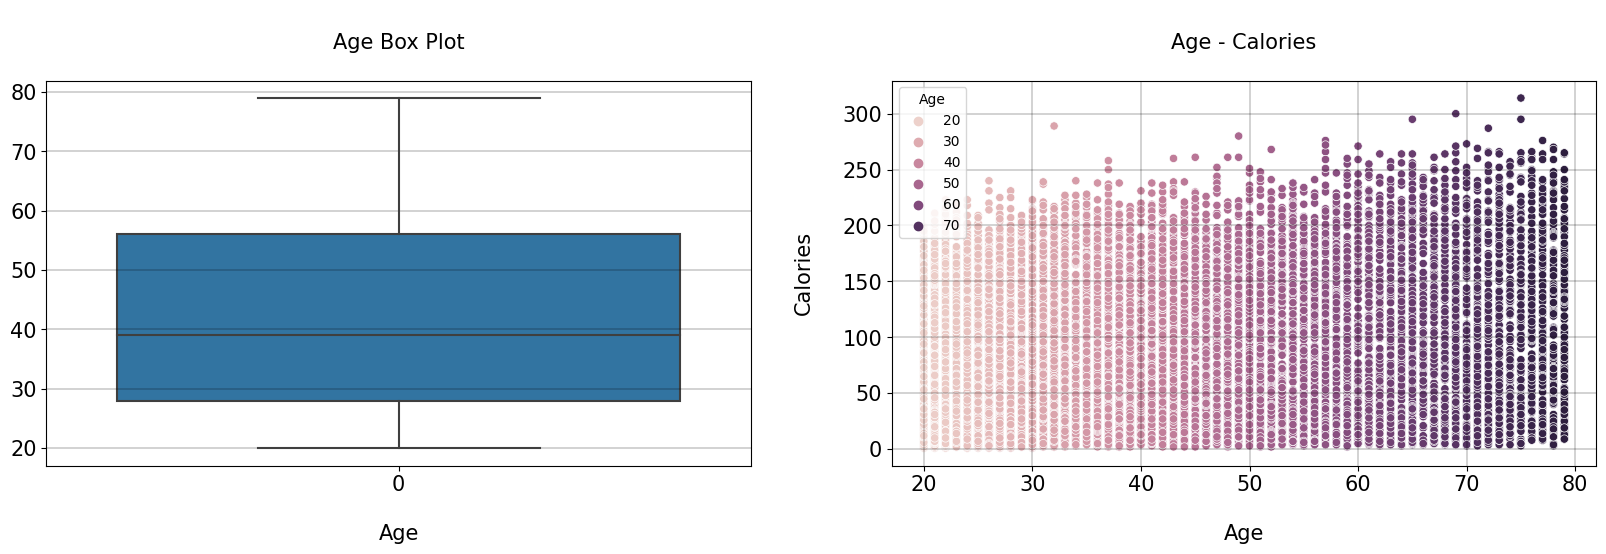

In [124]:
Numerical_Plot(df,'Age')

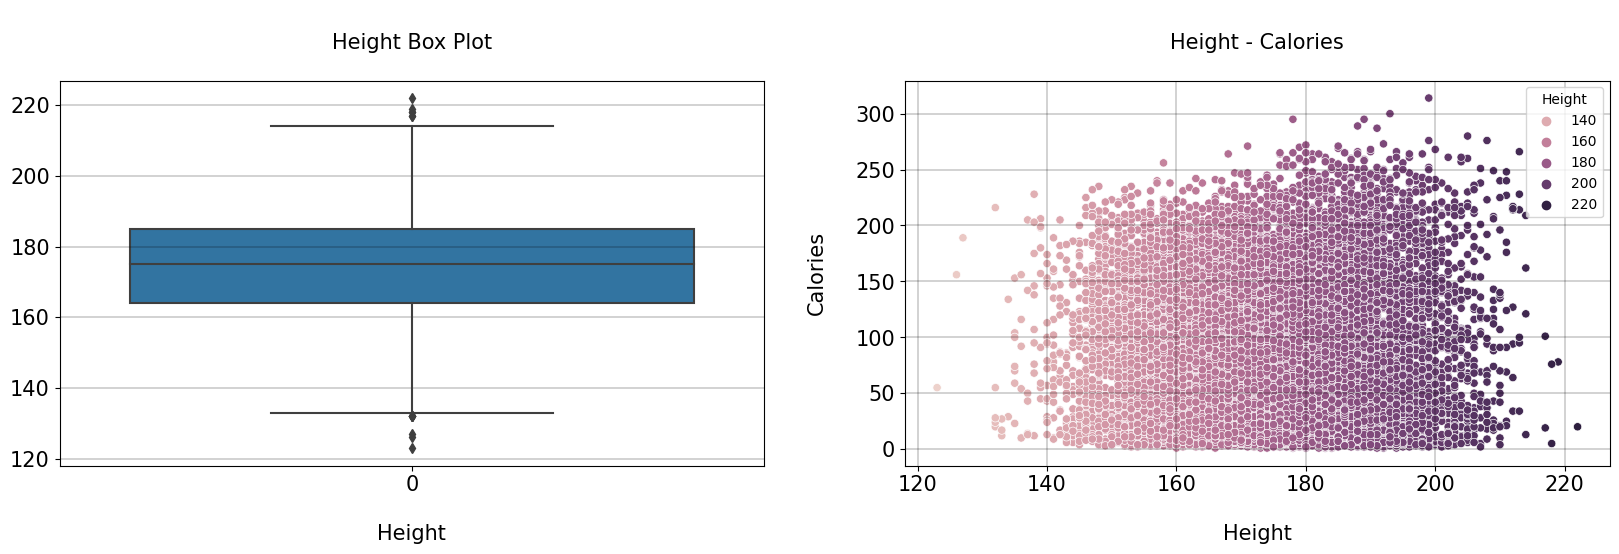

In [125]:
Numerical_Plot(df,'Height')

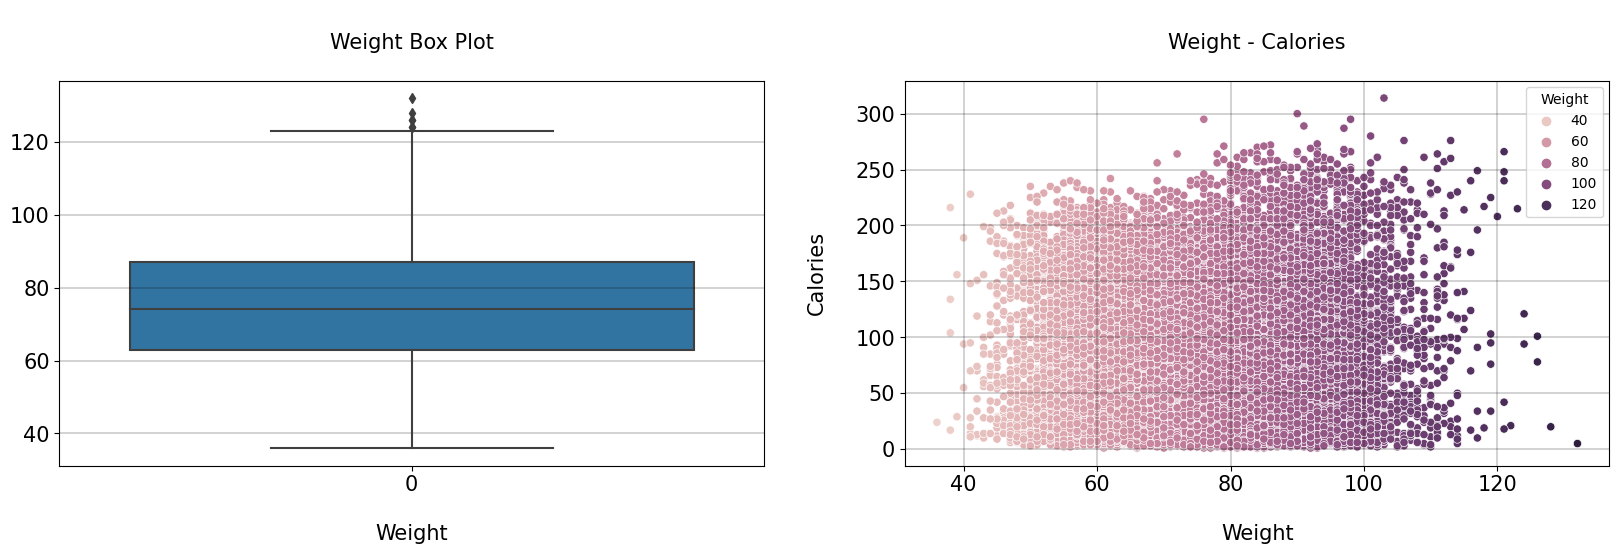

In [126]:
Numerical_Plot(df,'Weight')

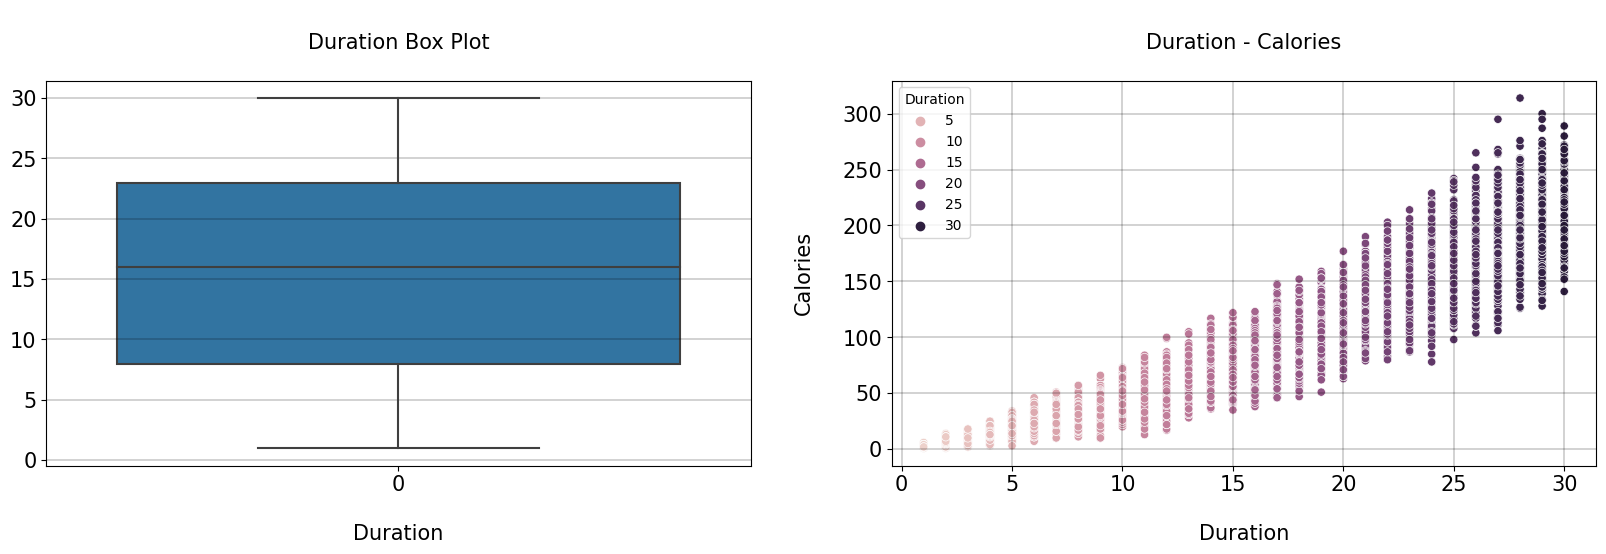

In [127]:
Numerical_Plot(df,'Duration')

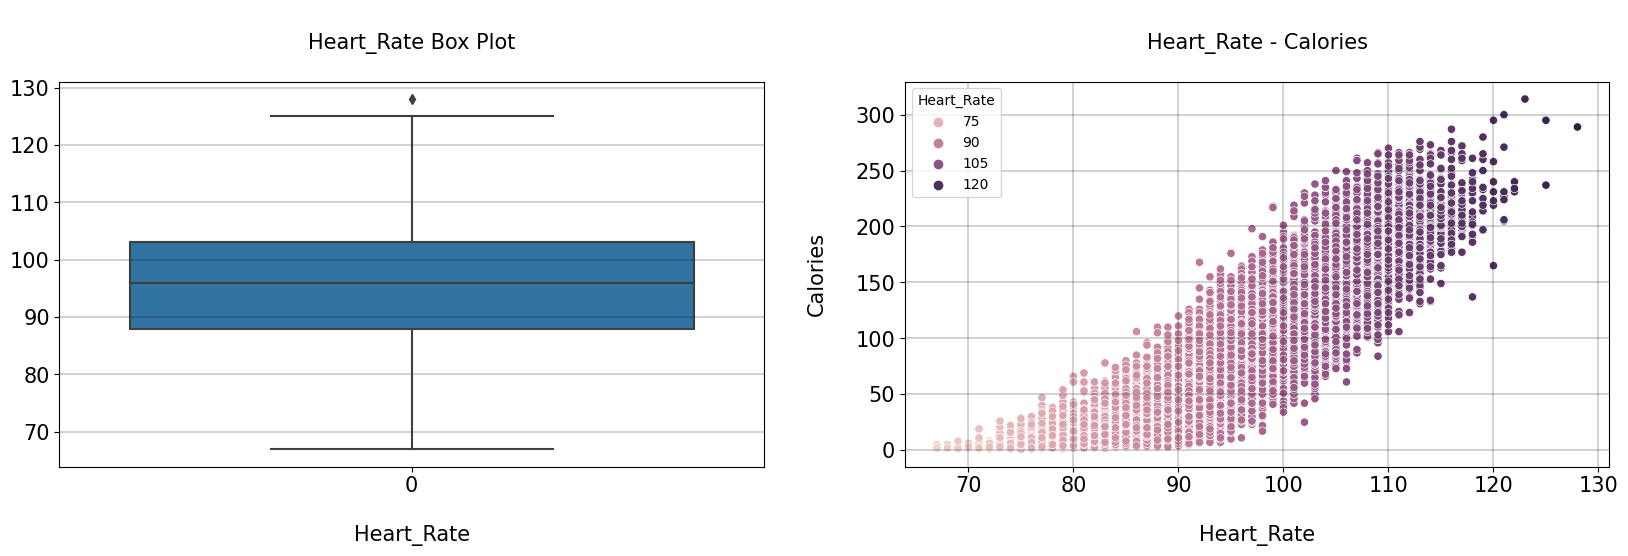

In [128]:
Numerical_Plot(df,'Heart_Rate')

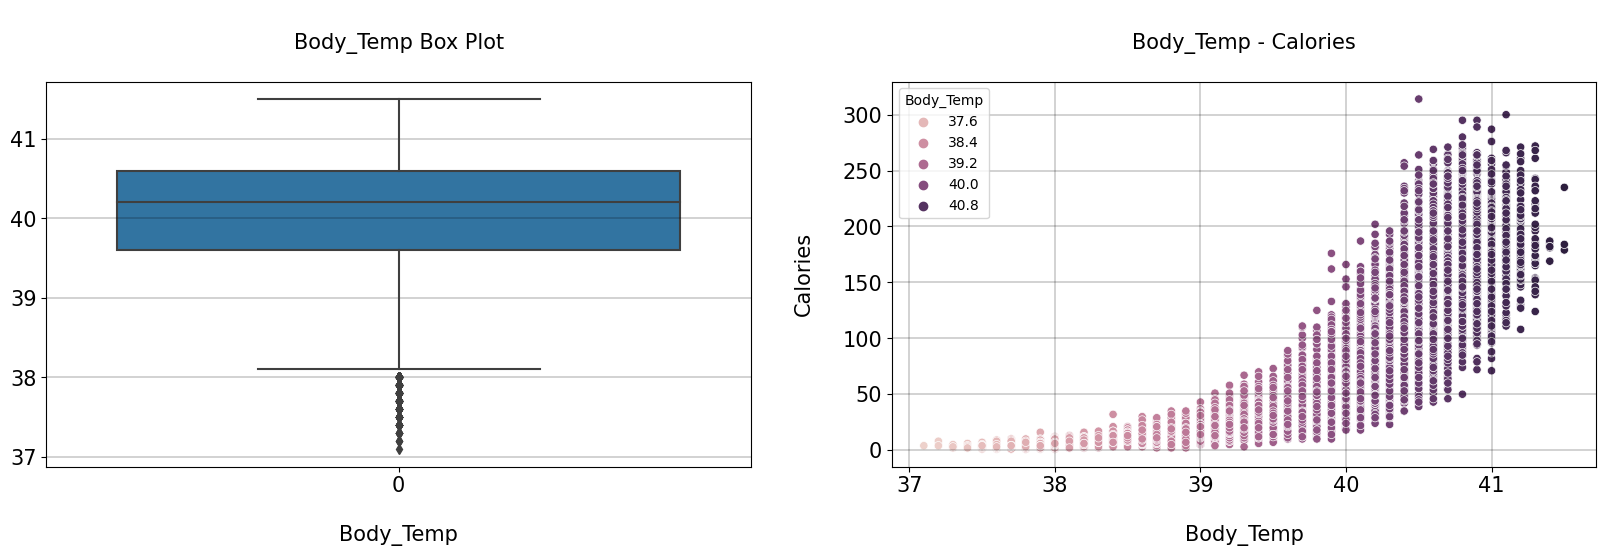

In [129]:
Numerical_Plot(df,'Body_Temp')

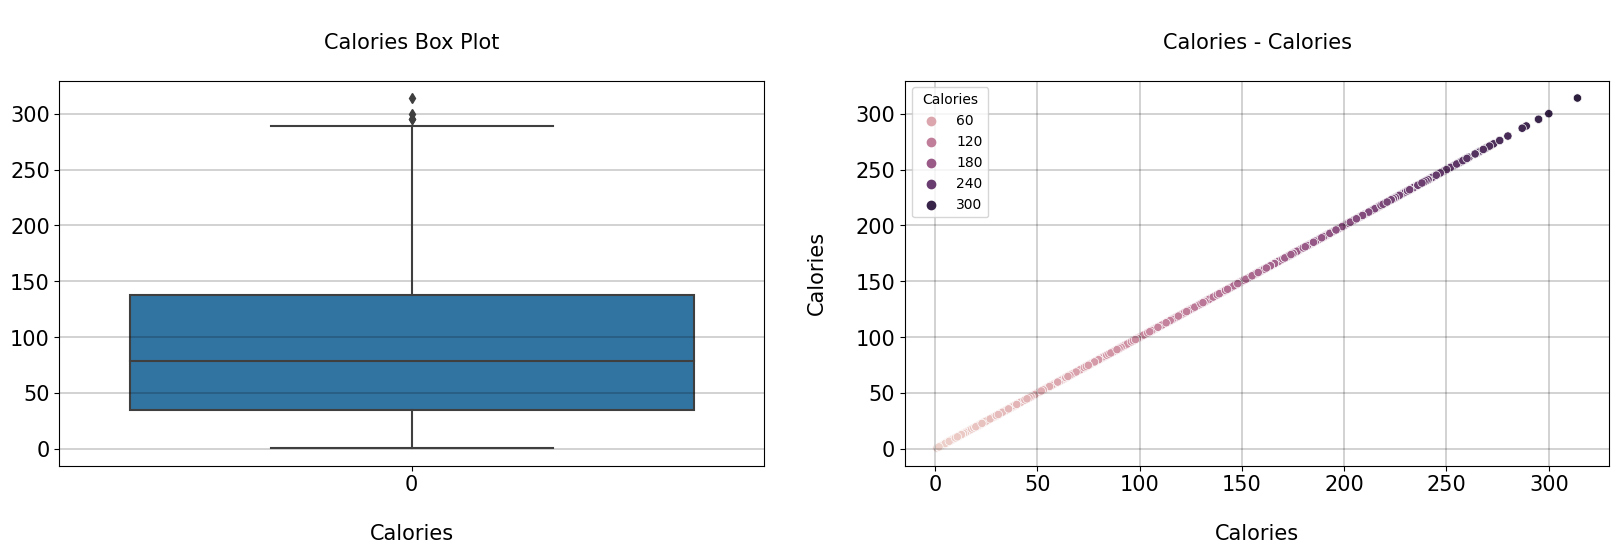

In [130]:
Numerical_Plot(df,'Calories')

In [131]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: xlabel='Gender', ylabel='count'>

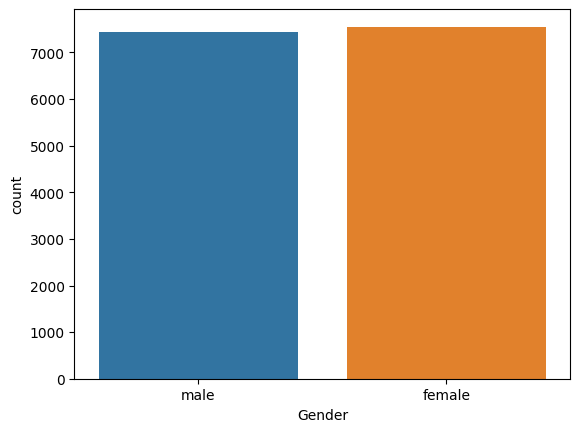

In [132]:
sns.countplot(data = df , x = 'Gender')

In [133]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [134]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


<ipython-input-136-c533a8627523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

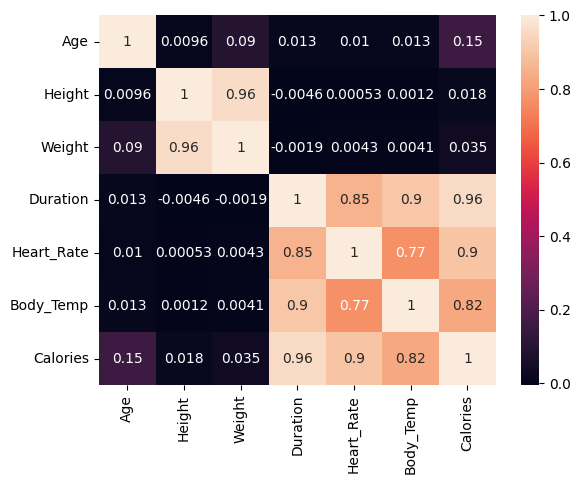

In [136]:
corr = df.corr()
sns.heatmap(data = corr , annot = True)

In [137]:
Average_calories_gender = df.groupby('Gender')['Calories'].mean().reset_index()
Average_calories_gender

,Gender,Calories
0,female,88.153052
1,male,90.945750


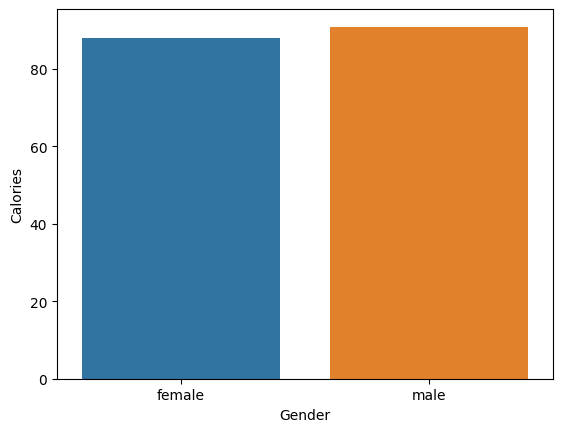

In [138]:
sns.barplot(data = Average_calories_gender , x = 'Gender' , y = 'Calories')
plt.show()


In [139]:
Average_weight_gender = df.groupby('Gender')['Weight'].mean().reset_index()
Average_weight_gender

,Gender,Weight
0,female,63.274460
1,male,86.825702


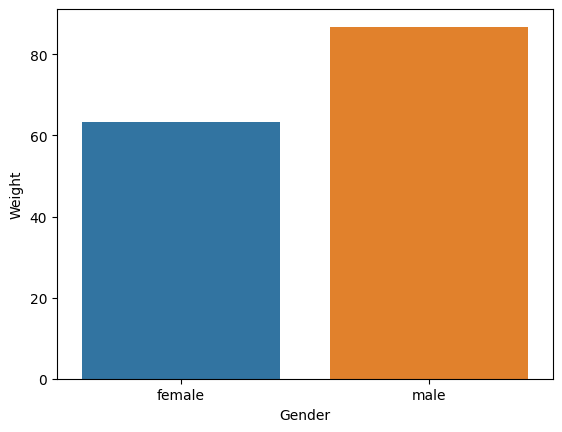

In [140]:
sns.barplot(data = Average_weight_gender , x = 'Gender' , y = 'Weight')
plt.show()


In [141]:
Average_Duration_gender = df.groupby('Gender')['Duration'].mean().reset_index()
Average_Duration_gender

,Gender,Duration
0,female,15.502185
1,male,15.559420


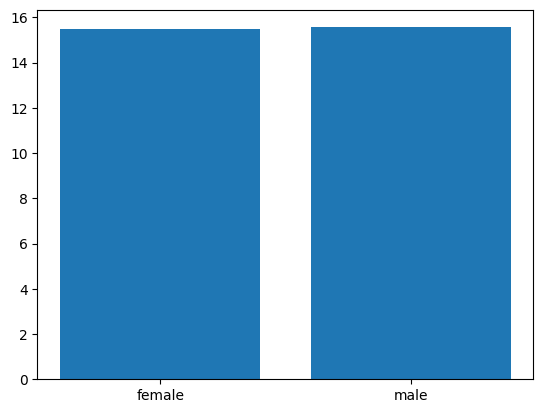

In [142]:
plt.bar(data = Average_Duration_gender , x = 'Gender' , height = 'Duration')
plt.show()


In [143]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [144]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler
from sklearn.linear_model import LinearRegression ,Lasso , Ridge
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [145]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [146]:
df = pd.get_dummies(df, columns=["Gender"], prefix=["Gender"])

In [147]:
df.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1
1,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,0,1
3,34,179.0,71.0,13.0,100.0,40.5,71.0,1,0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,1,0


In [148]:
X = df.drop('Calories',axis = 1)
y = df['Calories']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [150]:
scaler = StandardScaler()

In [151]:
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

MAE 8.485500266205534
R2SCORE 0.9664761983139257


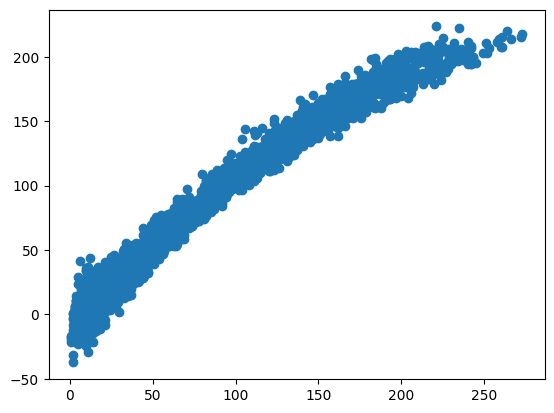

In [152]:
linReg = LinearRegression()
linReg.fit(X_train_scaled,y_train)
y_pred = linReg.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

MAE 9.18912373148157
R2SCORE 0.9605994332787821


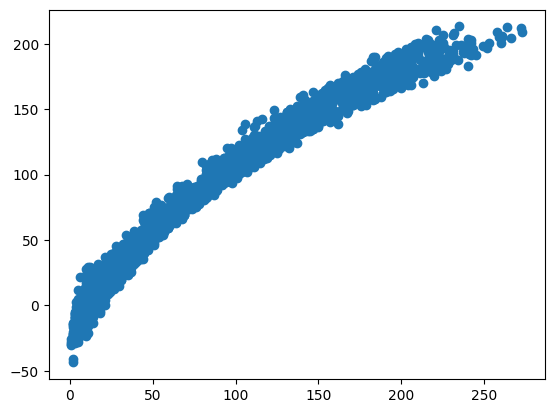

In [153]:
las = Lasso()
las.fit(X_train_scaled,y_train)
y_pred = las.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

MAE 8.485210189705304
R2SCORE 0.9664763854751022


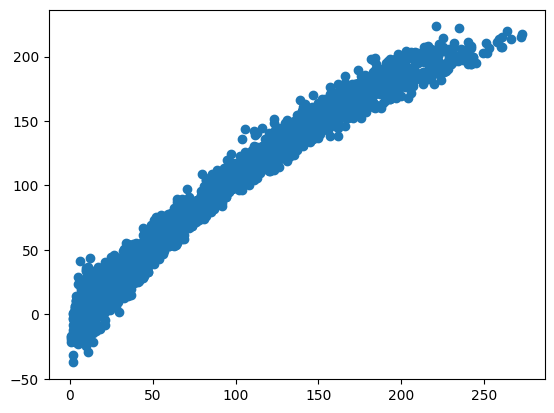

In [154]:
rid = Ridge()
rid.fit(X_train_scaled,y_train)
y_pred = rid.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

MAE 15.17762769365157
R2SCORE 0.9013859594260635


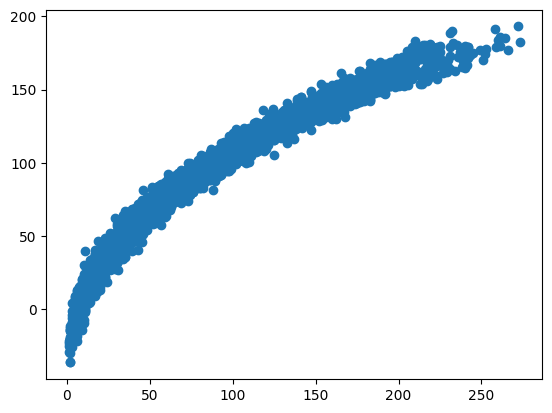

In [155]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

MAE 3.2376666666666667
R2SCORE 0.9935599241954384


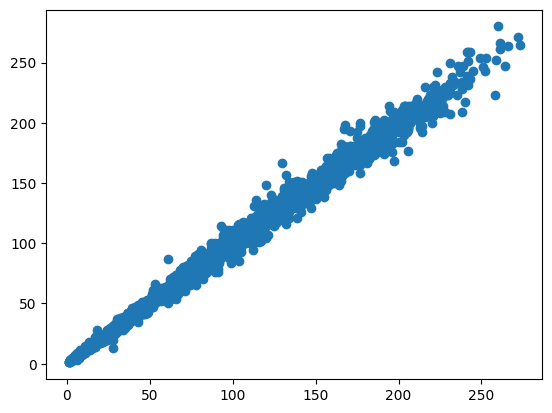

In [156]:
from sklearn.tree import DecisionTreeRegressor
DR = DecisionTreeRegressor()
DR.fit(X_train_scaled,y_train)
y_pred = DR.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)

MAE 1.74087
R2SCORE 0.9980019532971277


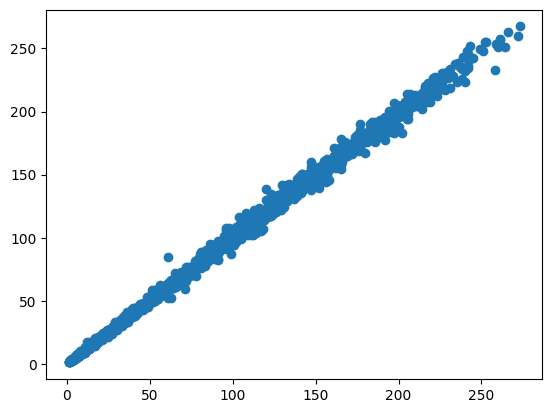

In [157]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train_scaled,y_train)
y_pred = RF.predict(X_test_scaled)
MAE = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test , y_pred)
print('MAE' , MAE)
print('R2SCORE',score)
plt.scatter(y_test , y_pred)